## 🚀 Python Lab: Tesla stock price prediction using LSTM networks
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Tesla_Motors.svg/111px-Tesla_Motors.svg.png" alt="Tesla Logo"/> <br>
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 5 - April 26, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week09/02_LSTM_Keras_TeslaStock_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week09/02_LSTM_Keras_TeslaStock_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries
> **TODO:** Install the required packages/libs
> - `pip install pandas_datareader` <br>
> - `pip install yfinance==0.2.40`
<pip install yfinance>
<pip install fix_yahoo_finance>

In [1]:
# !pip install pandas_datareader

In [2]:
# !pip install yfinance==0.2.40

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import warnings # ignore warnings
warnings.filterwarnings('ignore')

## Import training and testing data
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZJyaRKLgpBK8MtVOori5sRz3E3HRVLrGavw&s" alt="Yahoo Finance"/>

In [4]:
yf.pdr_override()

# Train+Test Data
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2023,12,30)
df = pdr.get_data_yahoo("TSLA", start, end)

# Validation Data
start = datetime.datetime(2024,1,1)
end = datetime.date.today()
test_df = pdr.get_data_yahoo("TSLA", start, end)

# Preprocessing
# sort by date
df = df.sort_values('Date')
test_df = test_df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
test_df.reset_index(inplace=True)
test_df.set_index("Date", inplace=True)

df.tail()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [5]:
print('Train+Test data shape:', df.shape)
print('Validation data shape:', test_df.shape)

Train+Test data shape: (1258, 6)
Validation data shape: (217, 6)


## Data visualization

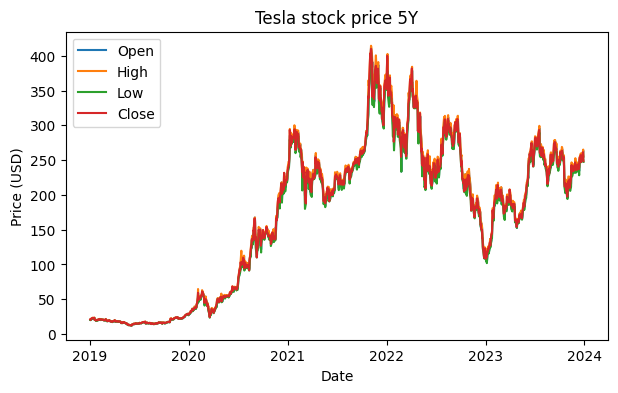

In [6]:
plt.figure(figsize = (7,4))
plt.title('Tesla stock price 5Y')
plt.plot(df.Open, label="Open")
plt.plot(df.High, label="High")
plt.plot(df.Low, label="Low")
plt.plot(df.Close, label="Close")
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

> **TODO:** Plot OHLC. you may want to install libraries below:
> - `pip install https://github.com/matplotlib/mpl_finance/archive/master.zip`
> - `pip install mplfinance`
> - `pip install finplot`

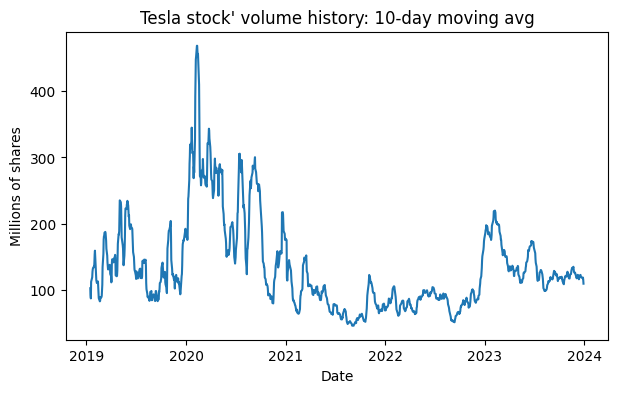

In [7]:
plt.figure(figsize = (7,4))
plt.title("Tesla stock' volume history: 10-day moving avg")
plt.plot(df.Volume.rolling(10).mean()/1e6)
plt.ylabel('Millions of shares')
plt.xlabel('Date')
plt.show()

## Split training & testing data (70%-30%)

In [8]:
data_target = df.filter(['Close'])
target = data_target.values
training_data_len = int(len(target)*0.70) ############################## hyperparam

train_data = target[:training_data_len,:]
test_data  = target[training_data_len:,:]

### Dataset normalization

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(train_data)

scale_factor = scaler.scale_
data_testing_array = scale_factor*test_data

### Construct sequential training and testing data

In [10]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i]) ###################################### hyperparam
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

x_test = []
y_test = [] 

for i in range(100, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-100: i]) ###################################### hyperparam
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test) 

print('Training x,y shape:', x_train.shape, y_train.shape)
print('Testing  x,y shape:', x_test.shape, y_test.shape)

Training x,y shape: (780, 100, 1) (780,)
Testing  x,y shape: (278, 100, 1) (278,)


## LSTM model

In [11]:
model = Sequential()  ############################################################## hyperparams
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

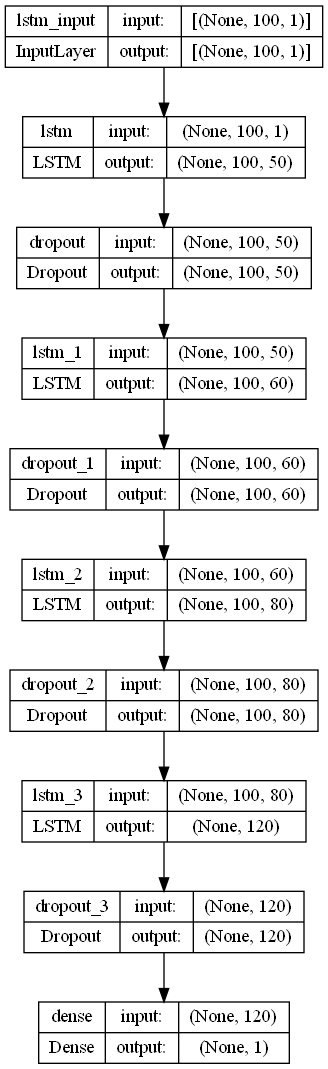

In [13]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

> **TODO:** Use different LSTM units and dropouts.

## Train the model

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])

In [15]:
import time
start_time = time.time()

history = model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

elapsed_time = time.time() - start_time
print(elapsed_time)

Epoch 1/50
25/25 [==============================] - 42s 1s/step - loss: 0.0921 - MAE: 0.2310 - val_loss: 0.0059 - val_MAE: 0.0623
Epoch 2/50
25/25 [==============================] - 33s 1s/step - loss: 0.0177 - MAE: 0.1059 - val_loss: 0.0056 - val_MAE: 0.0597
Epoch 3/50
25/25 [==============================] - 33s 1s/step - loss: 0.0131 - MAE: 0.0859 - val_loss: 0.0066 - val_MAE: 0.0662
Epoch 4/50
25/25 [==============================] - 35s 1s/step - loss: 0.0125 - MAE: 0.0801 - val_loss: 0.0049 - val_MAE: 0.0567
Epoch 5/50
25/25 [==============================] - 34s 1s/step - loss: 0.0104 - MAE: 0.0720 - val_loss: 0.0063 - val_MAE: 0.0650
Epoch 6/50
25/25 [==============================] - 34s 1s/step - loss: 0.0103 - MAE: 0.0695 - val_loss: 0.0042 - val_MAE: 0.0526
Epoch 7/50
25/25 [==============================] - 34s 1s/step - loss: 0.0105 - MAE: 0.0697 - val_loss: 0.0048 - val_MAE: 0.0567
Epoch 8/50
25/25 [==============================] - 33s 1s/step - loss: 0.0088 - MAE: 0.06

> **TODO:**
> - Use the following command to split the training data:
> `history = model.fit(x_train, y_train, epochs = 50, batch_size = 10, validation_split = 0.3)`
> - Use the following argument: `shuffle=True`. Does it make any difference?

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test MAE: ', scores[1])

9/9 [==============================] - 2s 172ms/step - loss: 0.0031 - MAE: 0.0463
Test loss: 0.0030805100686848164
Test MAE:  0.046321168541908264


In [17]:
# model.save('keras_model_tsla_2019_2024.h5')

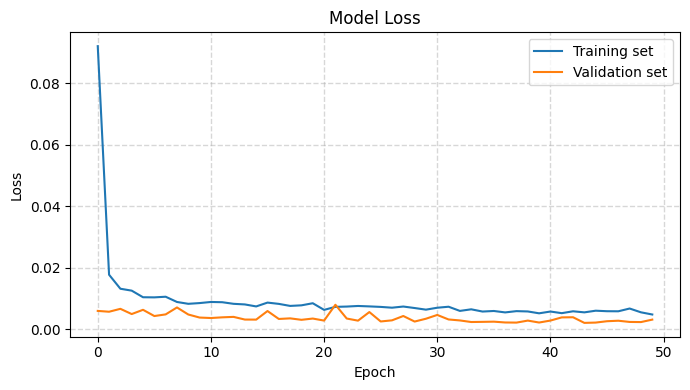

In [18]:
def render_training_history_loss(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']
    plt.figure(figsize=(7, 4))
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Validation set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.tight_layout()
    plt.show()
    
render_training_history_loss(history)

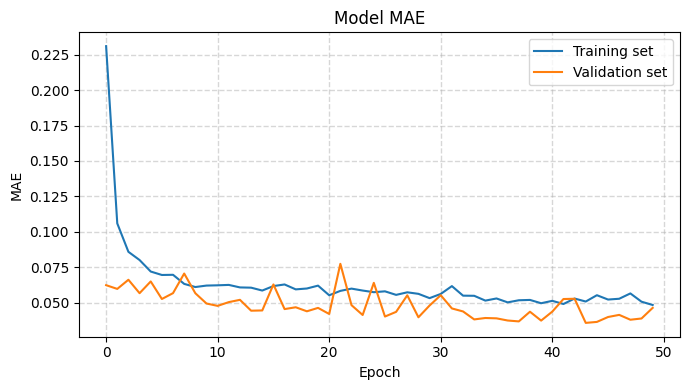

In [19]:
def render_training_history_MAE(training_history):
    acc = training_history.history['MAE']
    val_acc = training_history.history['val_MAE']
    plt.figure(figsize=(7, 4))
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(acc, label='Training set')
    plt.plot(val_acc, label='Validation set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.tight_layout()
    plt.show()
    
render_training_history_MAE(history)

## Make predictions

In [20]:
y_pred = model.predict(x_test)
price_pred = scaler.inverse_transform(y_pred)

9/9 [==============================] - 2s 179ms/step


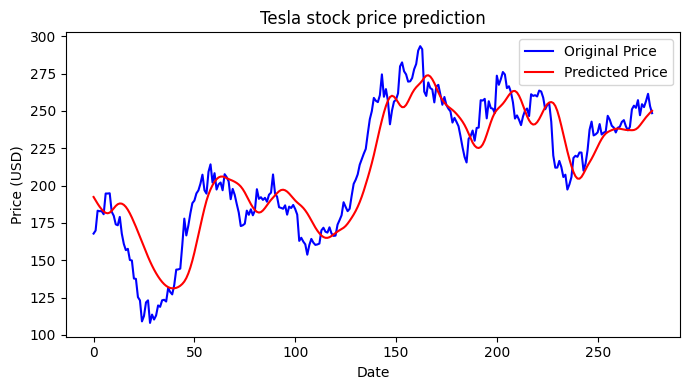

In [21]:
plt.figure(figsize = (7,4))
plt.title('Tesla stock price prediction')
plt.plot(y_test/scale_factor, 'b', label = "Original Price")
plt.plot(price_pred, 'r', label = "Predicted Price")
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

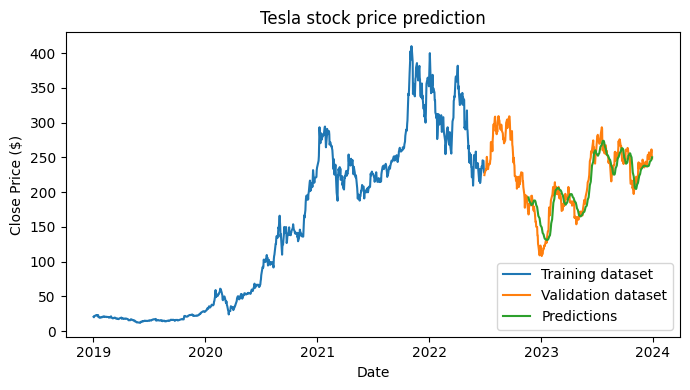

In [22]:
train = data_target[:training_data_len] 
test  = data_target[training_data_len:]
pred  = data_target[training_data_len+100:] ###################################### hyperparam
pred['Predictions'] = price_pred

plt.figure(figsize = (7,4))
plt.title('Tesla stock price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train.Close)
plt.plot(test.Close)
plt.plot(pred.Predictions)
plt.legend(['Training dataset', 'Validation dataset', 'Predictions'], loc='lower right')
plt.tight_layout()
plt.show()

In [23]:
mae = mean_absolute_error(y_test/scale_factor, price_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  14.203818122260005


> **TODO:** Test the neweork to predict more than one step with another dataset: Validation data, which is the market data from the begining of 2024 until today. Give the network data in a 100 days period and compare its predictions with actual prices.